## Problem Statement
- An India's leading micro-mobility service provider has recently suffered considerable dips in its revenues.
- The Company wants to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

## Importing Neccessary Libraries and Loading Dataset

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [4]:
# Loading Dataset
ms_df = pd.read_csv('data/bike_sharing.csv')
ms_df.head()  # ms stands for micromobility service

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Basic Metrics

In [5]:
print(ms_df.shape,end='\n\n')
print(f'The above tuple indicates that dataset consists of {ms_df.shape[0]} rows and {ms_df.shape[1]} columns')

(10886, 12)

The above tuple indicates that dataset consists of 10886 rows and 12 columns


In [6]:
ms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
ms_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
datetime,10886,10886,2011-01-01 00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,10886.0,NaN,NaN,NaN,2.506614,1.116174,1.0,2.0,3.0,4.0,4.0
holiday,10886.0,NaN,NaN,NaN,0.028569,0.166599,0.0,0.0,0.0,0.0,1.0
workingday,10886.0,NaN,NaN,NaN,0.680875,0.466159,0.0,0.0,1.0,1.0,1.0
weather,10886.0,NaN,NaN,NaN,1.418427,0.633839,1.0,1.0,1.0,2.0,4.0
temp,10886.0,NaN,NaN,NaN,20.23086,7.79159,0.82,13.94,20.5,26.24,41.0
atemp,10886.0,NaN,NaN,NaN,23.655084,8.474601,0.76,16.665,24.24,31.06,45.455
humidity,10886.0,NaN,NaN,NaN,61.88646,19.245033,0.0,47.0,62.0,77.0,100.0
windspeed,10886.0,NaN,NaN,NaN,12.799395,8.164537,0.0,7.0015,12.998,16.9979,56.9969
casual,10886.0,NaN,NaN,NaN,36.021955,49.960477,0.0,4.0,17.0,49.0,367.0


### Insights:
#### Range of Attributes:
- The Dataset has count of total electric cycles rented from Jan 2011 to Dec 2012 and features such as date of rent, weather, season, working day, humidity, temperature etc.
- There are 4 types of seasons and 4 types of weather conditions.
- Working days and Nonworking days are 7412 and 3474 respectively which implies
that electric cycles rented at 7412 and 3474 different datetime on working days and nonworking days respectively.
- Similarly, electric cycles rented at 511 and 10575 different datetime on holidays and non-holiday respectively.

In [8]:
ms_df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [9]:
#  Conversion of datetime from object to datetime format
ms_df['datetime'] = pd.to_datetime(ms_df['datetime'])

In [10]:
# Conversion of Categorical attributes to category
ms_df[['season','holiday','workingday','weather']] = ms_df[['season','holiday','workingday','weather']].astype('object')
ms_df.dtypes

datetime      datetime64[ns]
season                object
holiday               object
workingday            object
weather               object
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [11]:
ms_df.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [12]:
ms_df.describe(include='all').T # Includes Categorical Attributes

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
datetime,10886,NaN,NaN,NaN,2011-12-27 05:56:22.399411968,2011-01-01 00:00:00,2011-07-02 07:15:00,2012-01-01 20:30:00,2012-07-01 12:45:00,2012-12-19 23:00:00,NaN
season,10886.0,4.0,4.0,2734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
holiday,10886.0,2.0,0.0,10575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workingday,10886.0,2.0,1.0,7412.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather,10886.0,4.0,1.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temp,10886.0,NaN,NaN,NaN,20.23086,0.82,13.94,20.5,26.24,41.0,7.79159
atemp,10886.0,NaN,NaN,NaN,23.655084,0.76,16.665,24.24,31.06,45.455,8.474601
humidity,10886.0,NaN,NaN,NaN,61.88646,0.0,47.0,62.0,77.0,100.0,19.245033
windspeed,10886.0,NaN,NaN,NaN,12.799395,0.0,7.0015,12.998,16.9979,56.9969,8.164537
casual,10886.0,NaN,NaN,NaN,36.021955,0.0,4.0,17.0,49.0,367.0,49.960477


In [13]:
ms_df.isna().sum() # Checking the number of Null Values in Each Column

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [14]:
ms_df.isna().sum().sum() # Checking the number of Null Values in entire Dataset

0

In [15]:
ms_df.duplicated().sum() # Checking the total number of duplicate rows

0

## Non Graphical Analysis

In [16]:
ms_df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [17]:
ms_df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [18]:
ms_df['holiday'].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

In [19]:
ms_df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

In [20]:
ms_df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

#### Insights :
- Season 4 is the most frequent season.
- Weather 1 is the most frequent weather
- Working day is the most frequent day and holiday is the least.

In [21]:
ms_df.groupby('workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


In [22]:
ms_df.groupby('season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [23]:
ms_df.groupby('weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


- Most number of times the electrical bikes rented in working day
- Most number of times the electrical bikes rented in season 4 and weather 1

In [24]:
ms_df['datetime'].agg([min,max])

min   2011-01-01 00:00:00
max   2012-12-19 23:00:00
Name: datetime, dtype: datetime64[ns]

#### Insights
- The timeline of rent of electric bikes rented in the dataset is from 1st Jan 2011 - 19th Dec 2012

## Visual/Graphical Analysis

### Univariate Analysis

Text(0.5, 1.0, 'Holiday Distribution')

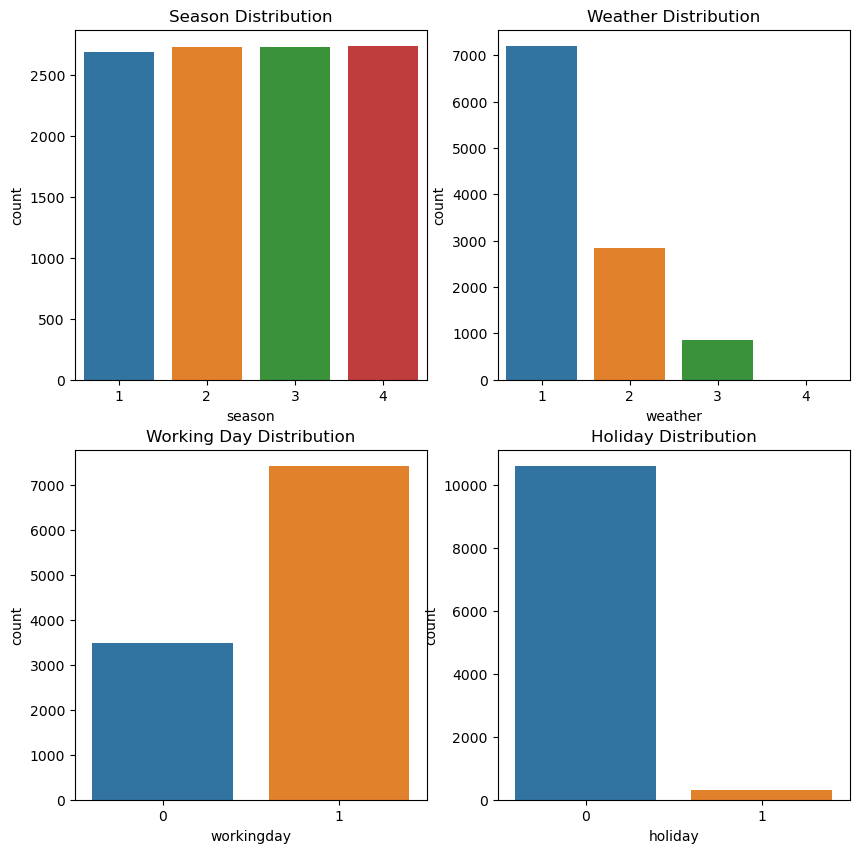

In [25]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

# Season Frequency
sns.countplot(data=ms_df,x='season',ax = axs[0,0])
axs[0,0].set_title('Season Distribution')

# Weather Frequency
sns.countplot(data=ms_df,x='weather',ax = axs[0,1])
axs[0,1].set_title('Weather Distribution')

# Working Day Frequency
sns.countplot(data=ms_df,x='workingday',ax = axs[1,0])
axs[1,0].set_title('Working Day Distribution')

# Holiday Frequency
sns.countplot(data=ms_df,x='holiday',ax = axs[1,1])
axs[1,1].set_title('Holiday Distribution')

<Axes: xlabel='season'>

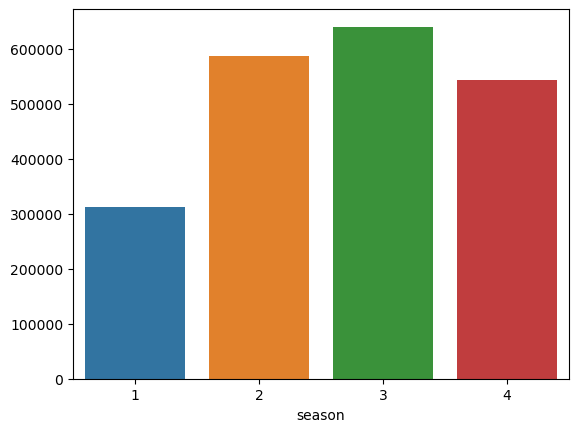

#### Insights
The Above Plots representation represent the count of each categorical attribute in Dataset.The below are the insights

- The count of all 4 seasons are almost same.In precise,season 4 is the most frequent one

- Weather 1 is more in count followed by 2,3 and 4.

Text(0.5, 1.0, 'Rented Cycles Quantity vs Holiday')

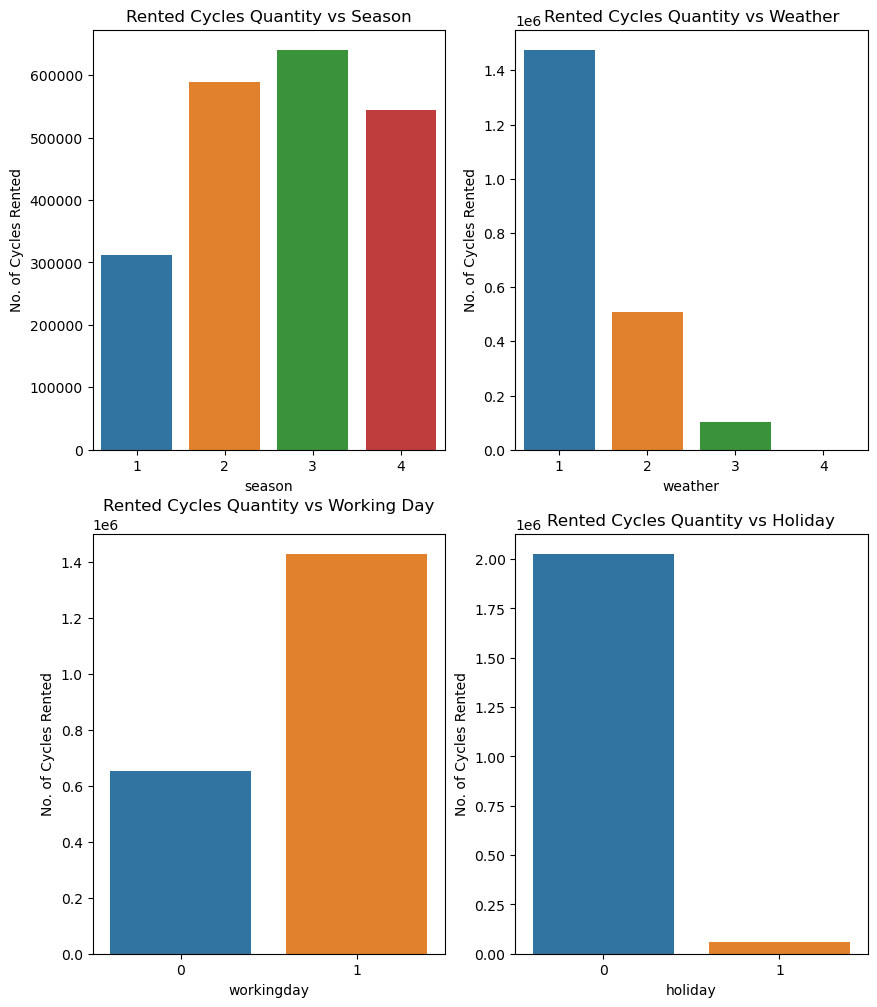

In [31]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(10,12))

# Number of Cycles Rented per Season
sns.barplot(x=ms_df.groupby('season')['count'].sum().index,
            y=ms_df.groupby('season')['count'].sum().values,ax = axs[0,0])
axs[0,0].set_ylabel('No. of Cycles Rented')
axs[0,0].set_title('Rented Cycles Quantity vs Season')

# Number of Cycles Rented per Season
sns.barplot(x = ms_df.groupby('weather')['count'].sum().index,
            y = ms_df.groupby('weather')['count'].sum().values ,ax = axs[0,1])
axs[0,1].set_ylabel('No. of Cycles Rented')
axs[0,1].set_title('Rented Cycles Quantity vs Weather')

# Number of Cycles Rented on Working Day and NonWorking Day
sns.barplot(x = ms_df.groupby('workingday')['count'].sum().index ,
            y = ms_df.groupby('workingday')['count'].sum().values,ax = axs[1,0])
axs[1,0].set_ylabel('No. of Cycles Rented')
axs[1,0].set_title('Rented Cycles Quantity vs Working Day')

# Number of Cycles Rented on Holiday and Non Holiday

y = ms_df.groupby('holiday')['count'].sum().values
sns.barplot(x = ms_df.groupby('holiday')['count'].sum().index,
            y = ms_df.groupby('holiday')['count'].sum().values,ax = axs[1,1])
axs[1,1].set_ylabel('No. of Cycles Rented')
axs[1,1].set_title('Rented Cycles Quantity vs Holiday')

#### Insights
The Above Plot represents the Number of Cycles Rented based on Category i.e. Weather,Season,Working Day and Holiday.The below
are the insights

- The Most Number of Cycles were rented in Season 3 followed by Season 2 , Season 4 and Season 1

- The Most Number of Cycles were rented in Weather 1 followed by Weather 2 , Weather 3 and Weather 4

- The Most Number of Cycles were rented in Working Day and days which are not Holidays

(0.0, 1.0, 0.0, 1.0)

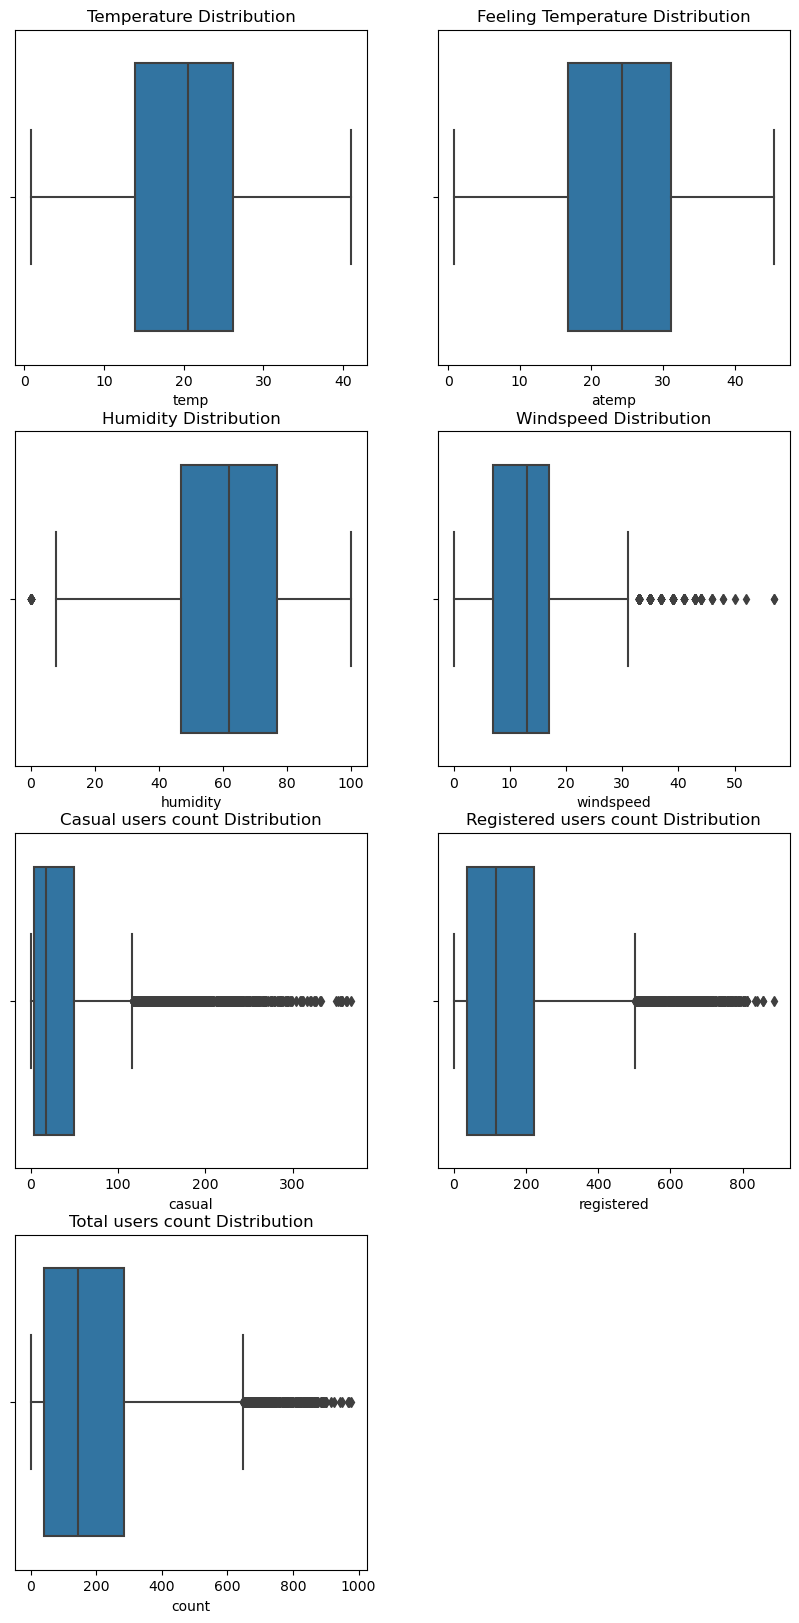

In [32]:
fig,axs = plt.subplots(nrows=4,ncols=2,figsize=(10,20))

# Season Frequency
sns.boxplot(data=ms_df,x='temp',ax = axs[0,0])
axs[0,0].set_title('Temperature Distribution')

# Weather Frequency
sns.boxplot(data=ms_df,x='atemp',ax = axs[0,1])
axs[0,1].set_title('Feeling Temperature Distribution')

# Working Day Frequency
sns.boxplot(data=ms_df,x='humidity',ax = axs[1,0])
axs[1,0].set_title('Humidity Distribution')

# Holiday Frequency
sns.boxplot(data=ms_df,x='windspeed',ax = axs[1,1])
axs[1,1].set_title('Windspeed Distribution')

sns.boxplot(data=ms_df,x='casual',ax = axs[2,0])
axs[2,0].set_title('Casual users count Distribution')

sns.boxplot(data=ms_df,x='registered',ax = axs[2,1])
axs[2,1].set_title('Registered users count Distribution')

sns.boxplot(data=ms_df,x='count',ax = axs[3,0])
axs[3,0].set_title('Total users count Distribution')

axs[3,1].axis('off')

#### Insights
- Count,casual and registered is having more outliers followed by windspeed.Humidity is having few outliers.
- No outliers in temperature and feeling temperature

### Bivariate Analysis

<Axes: xlabel='season', ylabel='count'>

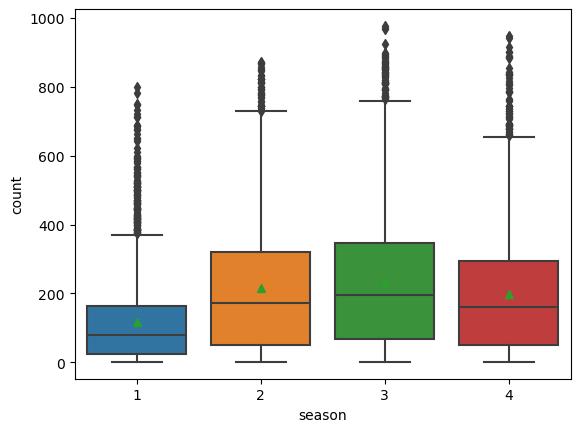

In [33]:
sns.boxplot(y=ms_df['count'],x=ms_df['season'],showmeans=True)

#### Insights
- Count of Electic bikes rented in Season 1 is having more outliers.
- Mean and Median Count of Electic bikes rented is more in season 3 than other seasons.

<Axes: xlabel='weather', ylabel='count'>

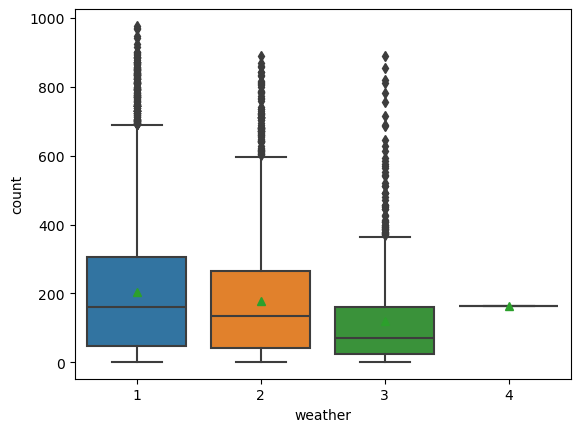

In [34]:
sns.boxplot(x=ms_df['weather'],y=ms_df['count'],showmeans=True)

#### Insights:
- Count of Electic bikes rented in Weather 3 is having more outliers.
- Mean and Median Count of Electic bikes rented is more in weather 1 than other weather conditions.

<Axes: xlabel='workingday', ylabel='count'>

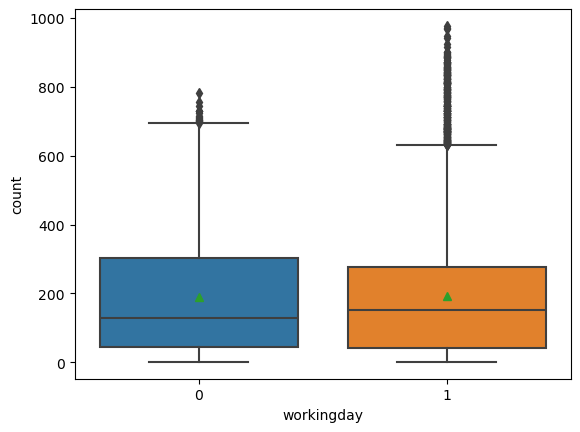

In [35]:
sns.boxplot(x=ms_df['workingday'],y=ms_df['count'],showmeans=True)

#### Insights
- Count of Electic bikes rented on Working day is having more outliers.
- Median Count of Electric Bikes rented on Working Day is greater than that of Non Working Day.
- Mean Count of Electric Bikes rented on Working Day is almost similiar to that of Non Working Day.

<Axes: xlabel='holiday', ylabel='count'>

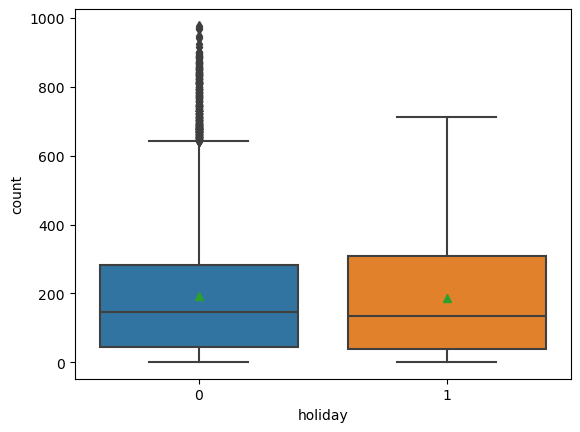

In [36]:
sns.boxplot(x=ms_df['holiday'],y=ms_df['count'],showmeans=True)

Text(0.5, 1.0, 'Season vs Weather')

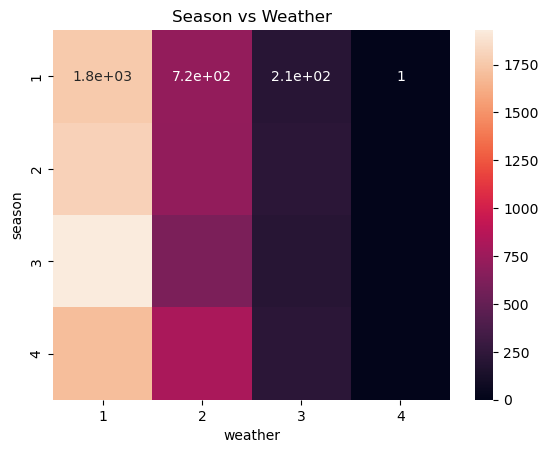

In [37]:
# Season and Weather Relation
ct = pd.crosstab(ms_df['season'],ms_df['weather'])
sns.heatmap(ct,annot=True)
plt.title('Season vs Weather')

- All the 4 seasons are having most frequent weather type as 1 i.e. Clear, Few clouds, partly cloudy

<Axes: >

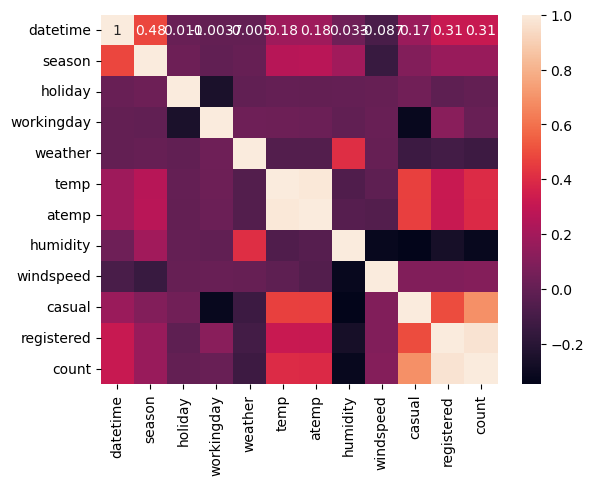

In [38]:
# Correlation between numerical attributes
num_correlation_matrix = ms_df.corr()
sns.heatmap(num_correlation_matrix,annot=True)

#### Insights
- Temperature and Feeling Temperature are the most positive correlated followed by count and registered,count and casual
- Humidity is negatively correlated to all other numerical attributes.
- Humidity and Count of casual users are most negatively correlated

## Hypothesis Testing

### Weather and Season

In [39]:
print(f'\033[4mHypothesis Formulation\033[0m:')
print(f'Null Hypothesis (H0) : Weather and Season are independant')
print(f'Alternate Hypothesis (Ha) : Weather is dependant on Season',end='\n\n')


from scipy.stats import chi2_contingency
observed = pd.crosstab(ms_df['season'],ms_df['weather'])
test_statistic, p_value, dof, expected = chi2_contingency(observed)

'''Since hypothesis testing has to be done between two categorical attributes i.e. Season and Weather , Chisquared Test is
   required'''

print(f'\033[4mChisquared test results\033[0m:')
print("Test statistic:", test_statistic)
print("p-value:", p_value)
print()
alpha = 0.05
print(f'\033[4mConclusion based on p_value\033[0m:')
if(p_value < alpha):
  print("Reject H0 (Null Hypothesis).Hence,Weather is dependent on Season ")
else:
  print("Fail to Reject H0 (Null Hypothesis).Hence,Weather and Season are Independent")

Hypothesis Formulation:
Null Hypothesis (H0) : Weather and Season are independant
Alternate Hypothesis (Ha) : Weather is dependant on Season

Chisquared test results:
Test statistic: 49.158655596893624
p-value: 1.549925073686492e-07

Conclusion based on p_value:
Reject H0 (Null Hypothesis).Hence,Weather is dependent on Season 


### Number of Cycles Rented and Weather

In [40]:
print(f'\033[4mHypothesis Formulation\033[0m:')
print(f'Null Hypothesis (H0) : The mean number of cycles rented is similiar in different weather')
print(f'Alternate Hypothesis (Ha) : The mean number of cycles rented is different in different weather',end='\n\n')

ecc_w1 = ms_df[ms_df['weather'] == 1]['count'].values
ecc_w2 = ms_df[ms_df['weather'] == 2]['count'].values
ecc_w3 = ms_df[ms_df['weather'] == 3]['count'].values
ecc_w4 = ms_df[ms_df['weather'] == 4]['count'].values

#'''As the one is  weather  : Categorical (4 Categories)  and another is Number of Cycles Rented: Numerical, ANOVA test shall be
#done provided that the sample follow its assumptions:
#1.The samples are independent.
#2.Each sample is from a normally distributed population.
#3.The population standard deviations of the groups are all equal. This property is known as homoscedasticity.'''

Hypothesis Formulation:
Null Hypothesis (H0) : The mean number of cycles rented is similiar in different weather
Alternate Hypothesis (Ha) : The mean number of cycles rented is different in different weather



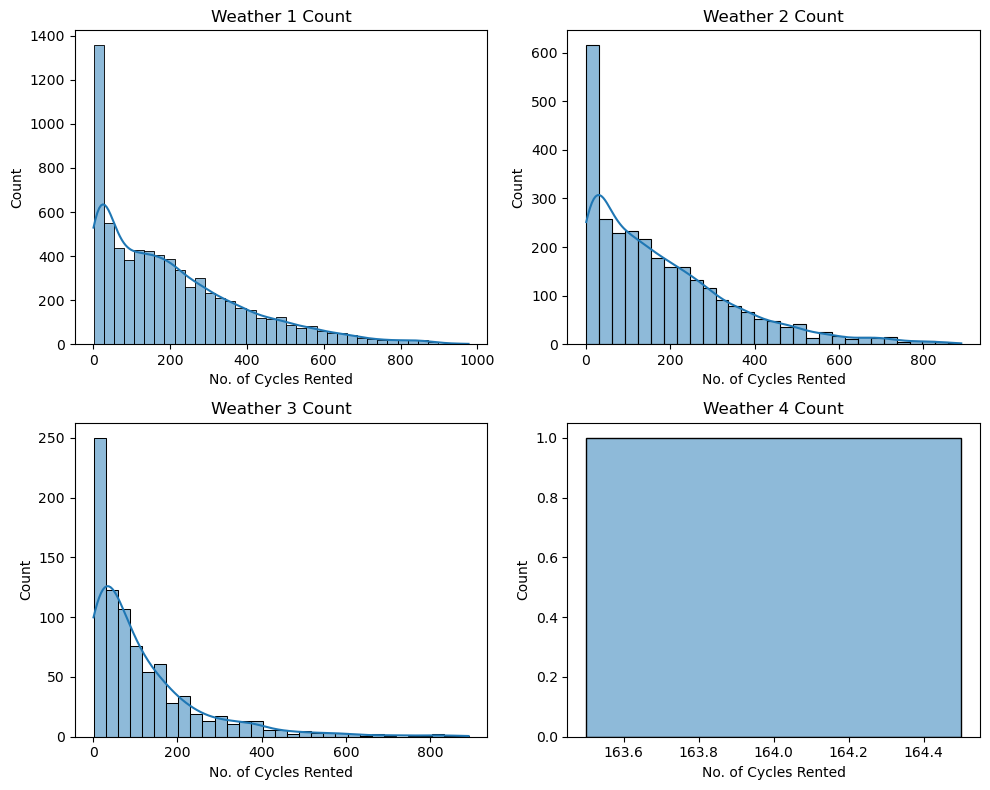

In [41]:
'''Visual Analysis to check Normal distribution of Weatherwise Rented cycles Count -Histogram'''


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

sns.histplot(ms_df[ms_df['weather'] == 1]['count'],kde=True, ax=axs[0, 0])
axs[0, 0].set_xlabel('No. of Cycles Rented')
axs[0, 0].set_title('Weather 1 Count')

sns.histplot(ms_df[ms_df['weather'] == 2]['count'],kde=True, ax=axs[0, 1])
axs[0, 1].set_xlabel('No. of Cycles Rented')
axs[0, 1].set_title('Weather 2 Count')

sns.histplot(ms_df[ms_df['weather'] == 3]['count'],kde=True, ax=axs[1, 0])
axs[1, 0].set_xlabel('No. of Cycles Rented')
axs[1, 0].set_title('Weather 3 Count')

sns.histplot(ms_df[ms_df['weather'] == 4]['count'],kde=True, ax=axs[1, 1])
axs[1, 1].set_xlabel('No. of Cycles Rented')
axs[1, 1].set_title('Weather 4 Count')

plt.tight_layout()
plt.show()

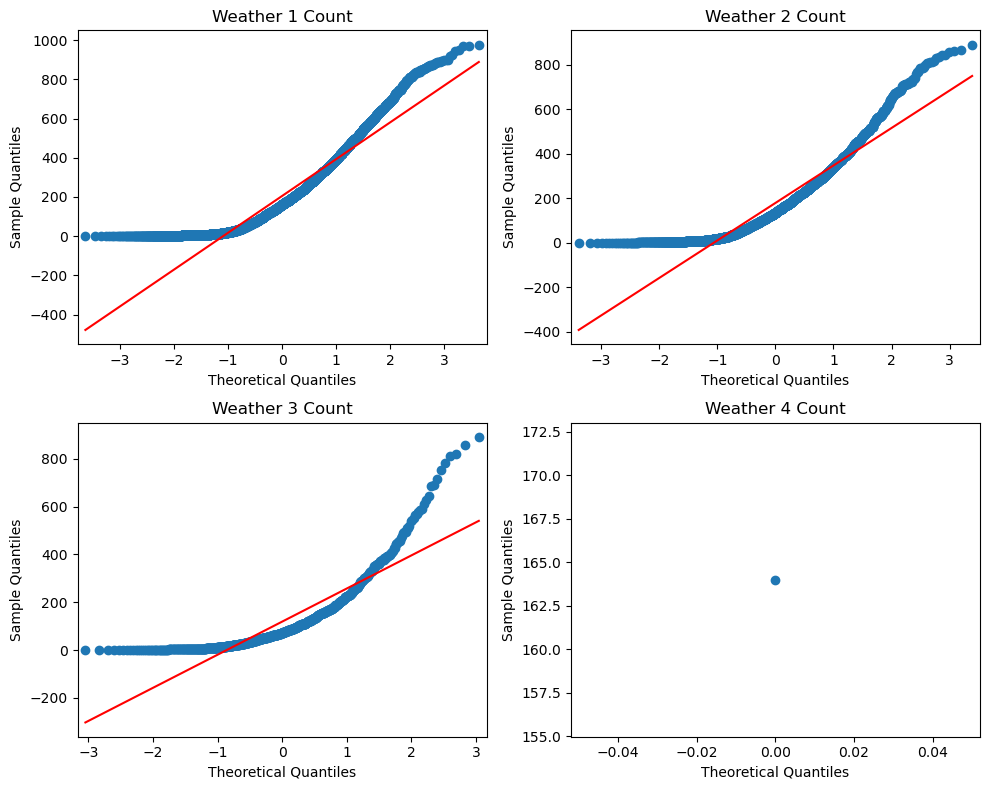

In [42]:
'''Visual Analysis to check Normal distribution of Weatherwise Rented cycles Count - QQ Plot'''

from statsmodels.graphics.gofplots import qqplot

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

qqplot(ms_df[ms_df['weather'] == 1]['count'], line='s', ax=axs[0, 0])
axs[0, 0].set_title('Weather 1 Count')

qqplot(ms_df[ms_df['weather'] == 2]['count'], line='s', ax=axs[0, 1])
axs[0, 1].set_title('Weather 2 Count')

qqplot(ms_df[ms_df['weather'] == 3]['count'], line='s', ax=axs[1, 0])
axs[1, 0].set_title('Weather 3 Count')

qqplot(ms_df[ms_df['weather'] == 4]['count'], line='s', ax=axs[1, 1])
axs[1, 1].set_title('Weather 4 Count')

plt.tight_layout()
plt.show()

- From Histogram and QQ Plot it was observed the count attribute of four weathers is not following Normal Distribution.

In [43]:
from scipy.stats import levene,shapiro

levene(ecc_w1,ecc_w2,ecc_w3,ecc_w4)

LeveneResult(statistic=54.85106195954556, pvalue=3.504937946833238e-35)

In [44]:
shapiro(ecc_w1)

ShapiroResult(statistic=0.8909259459740138, pvalue=1.5964921477006555e-57)

In [45]:
shapiro(ecc_w2)

ShapiroResult(statistic=0.8767694973495206, pvalue=9.777839106111785e-43)

In [46]:
shapiro(ecc_w3)

ShapiroResult(statistic=0.7674327906035717, pvalue=3.875893017396149e-33)

- As the p_value from levene test and shapiro tests are far lesser than sigificance level(alpha) of 0.05,sample from four seasons is not having equal variance and normal distributed.
- Hence,ANOVA test should not be applied and Kruskal - Wallis test shall be applied

In [47]:
from scipy.stats import kruskal

statistic,p_value = kruskal(ecc_w1,ecc_w2,ecc_w3,ecc_w4)

print(f'\033[4mKruskal test results\033[0m:')
print('statistic:',statistic)
print('p_value:',p_value)
print()

alpha = 0.05
print(f'\033[4mConclusion based on p_value\033[0m:')
if(p_value < alpha):
  print("Reject H0 (Null Hypothesis).Hence,The mean number of cycles rented is different in different weather ")
else:
  print("Fail to Reject H0 (Null Hypothesis).Hence,The mean number of cycles rented is similiar in different weather")

Kruskal test results:
statistic: 205.00216514479087
p_value: 3.501611300708679e-44

Conclusion based on p_value:
Reject H0 (Null Hypothesis).Hence,The mean number of cycles rented is different in different weather 


### Number of Cycles Rented and Season

In [48]:
print(f'\033[4mHypothesis Formulation\033[0m:')
print(f'Null Hypothesis (H0) : The mean number of cycles rented is similiar in different seasons')
print(f'Alternate Hypothesis (Ha) : The mean number of cycles rented is different in different seasons',end='\n\n')

ecc_s1 = ms_df[ms_df['season'] == 1]['count'].values
ecc_s2 = ms_df[ms_df['season'] == 2]['count'].values
ecc_s3 = ms_df[ms_df['season'] == 3]['count'].values
ecc_s4 = ms_df[ms_df['season'] == 4]['count'].values

#'''As the one is  season  : Categorical (4 Categories)  and another is Number of Cycles Rented : Numerical, ANOVA test shall be
#done provided that the sample follow its assumptions:
#1.The samples are independent.
#2.Each sample is from a normally distributed population.
#3.The population standard deviations of the groups are all equal. This property is known as homoscedasticity.'''

Hypothesis Formulation:
Null Hypothesis (H0) : The mean number of cycles rented is similiar in different seasons
Alternate Hypothesis (Ha) : The mean number of cycles rented is different in different seasons



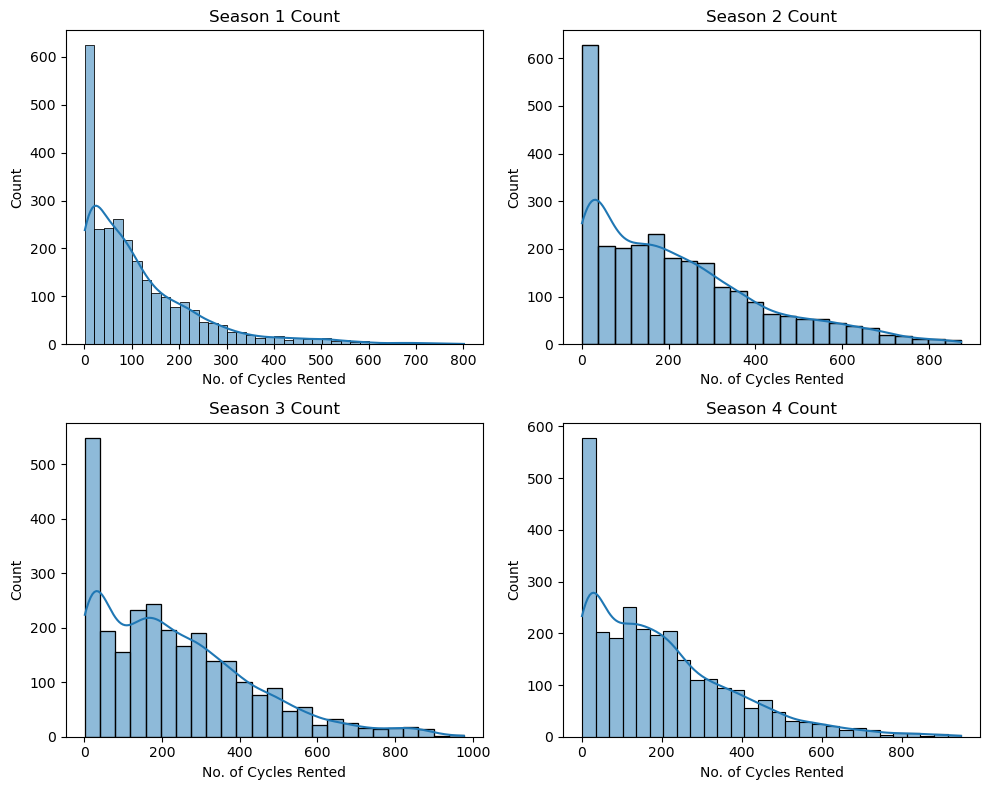

In [49]:
'''Visual Analysis to check Normal distribution of Seasonwise Count -Histogram'''


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

sns.histplot(ms_df[ms_df['season'] == 1]['count'],kde=True, ax=axs[0, 0])
axs[0, 0].set_xlabel('No. of Cycles Rented')
axs[0, 0].set_title('Season 1 Count')

sns.histplot(ms_df[ms_df['season'] == 2]['count'],kde=True, ax=axs[0, 1])
axs[0, 1].set_xlabel('No. of Cycles Rented')
axs[0, 1].set_title('Season 2 Count')

sns.histplot(ms_df[ms_df['season'] == 3]['count'],kde=True, ax=axs[1, 0])
axs[1, 0].set_xlabel('No. of Cycles Rented')
axs[1, 0].set_title('Season 3 Count')

sns.histplot(ms_df[ms_df['season'] == 4]['count'],kde=True, ax=axs[1, 1])
axs[1, 1].set_xlabel('No. of Cycles Rented')
axs[1, 1].set_title('Season 4 Count')

plt.tight_layout()
plt.show()

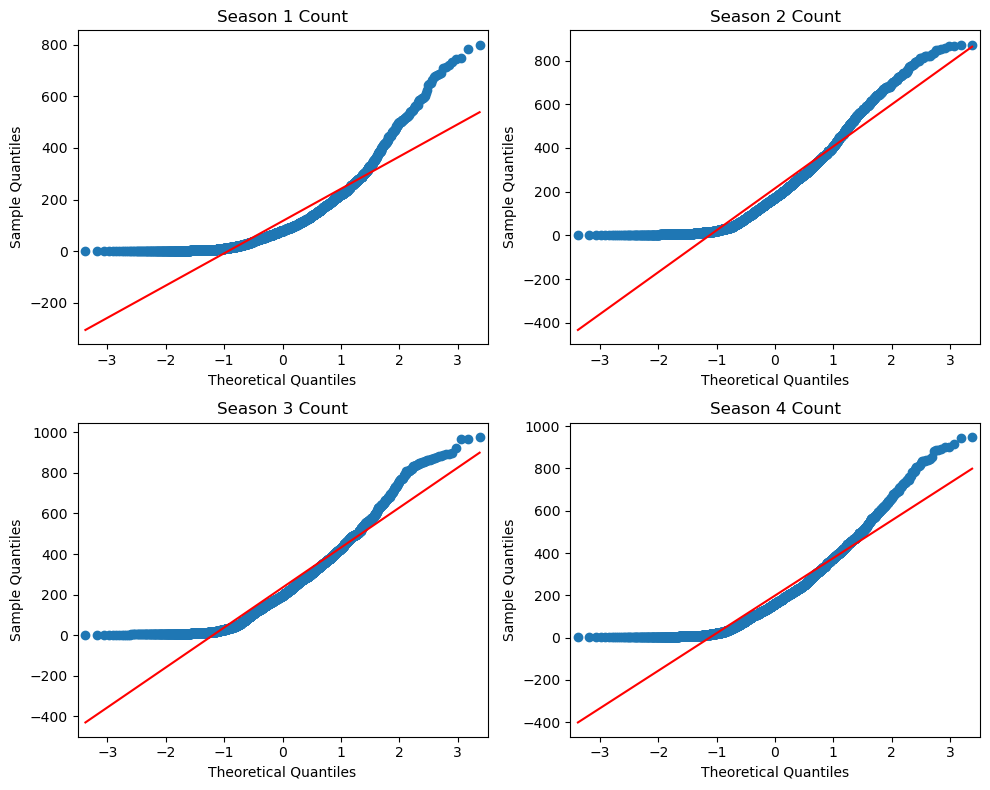

In [50]:
'''Visual Analysis to check Normal distribution of Seasonwise Count -QQ Plot'''

from statsmodels.graphics.gofplots import qqplot

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

qqplot(ms_df[ms_df['season'] == 1]['count'], line='s', ax=axs[0, 0])
axs[0, 0].set_title('Season 1 Count')

qqplot(ms_df[ms_df['season'] == 2]['count'], line='s', ax=axs[0, 1])
axs[0, 1].set_title('Season 2 Count')

qqplot(ms_df[ms_df['season'] == 3]['count'], line='s', ax=axs[1, 0])
axs[1, 0].set_title('Season 3 Count')

qqplot(ms_df[ms_df['season'] == 4]['count'], line='s', ax=axs[1, 1])
axs[1, 1].set_title('Season 4 Count')

plt.tight_layout()
plt.show()

- From Histogram and QQ Plot, it was observed the count attribute of four season is not following Normal Distribution

In [51]:
from scipy.stats import levene,shapiro

levene(ecc_s1,ecc_s2,ecc_s3,ecc_s4)

LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)

In [52]:
shapiro(ecc_s1)

ShapiroResult(statistic=0.8087378401253588, pvalue=8.749584618867662e-49)

In [53]:
shapiro(ecc_s2)

ShapiroResult(statistic=0.9004818080893252, pvalue=6.039374406270491e-39)

In [54]:
shapiro(ecc_s3)

ShapiroResult(statistic=0.9148166372899196, pvalue=1.043680518918597e-36)

In [55]:
shapiro(ecc_s4)

ShapiroResult(statistic=0.8954637482095505, pvalue=1.1299244409282836e-39)

- As the p_value from levene test and shapiro tests are far lesser than sigificance level(alpha) of 0.05,sample from four seasons is not having equal variance and normal distributed.
- Hence,ANOVA test should not be applied and Kruskal - Wallis test shall be applied.

In [58]:
from scipy.stats import kruskal

statistic,p_value = kruskal(ecc_s1,ecc_s2,ecc_s3,ecc_s4)

print(f'\033[4mKruskal Test Results\033[0m:')
print('statistic:',statistic)
print('p_value:',p_value)
print()

alpha = 0.05
print(f'\033[4mConclusion based on p_value\033[0m:')
if(p_value < alpha):
  print("Reject H0 (Null Hypothesis).Hence,The mean number of cycles rented is different in different seasons")
else:
  print("Fail to Reject H0 (Null Hypothesis).Hence,The mean number of cycles rented is similiar in different seasons")

Kruskal Test Results:
statistic: 699.6668548181988
p_value: 2.479008372608633e-151

Conclusion based on p_value:
Reject H0 (Null Hypothesis).Hence,The mean number of cycles rented is different in different seasons


### Number of Cycles Rented and Working Day

In [59]:
print(f'\033[4mHypothesis Formulation\033[0m:')
print(f'Null Hypothesis (H0) : The mean number of cycles rented is not affected by Working Day')
print(f'Alternate Hypothesis (Ha) : The mean number of cycles rented is  affected by Working Day',end='\n\n')

ecc_wd = ms_df[ms_df['workingday'] == 1]['count'].values
ecc_nwd = ms_df[ms_df['workingday'] == 0]['count'].values

#'''As the one is  WorkingDay  : Categorical (2 Categories)  and another is Number of Cycles Rented : Numerical, 2 Sample-T test
#shall be done provided that the sample follow its assumptions:
#1.The samples are independent.
#2.Each sample is from a normally distributed population.
#3.The population standard deviations of the groups are all equal. This property is known as homoscedasticity.'''

Hypothesis Formulation:
Null Hypothesis (H0) : The mean number of cycles rented is not affected by Working Day
Alternate Hypothesis (Ha) : The mean number of cycles rented is  affected by Working Day



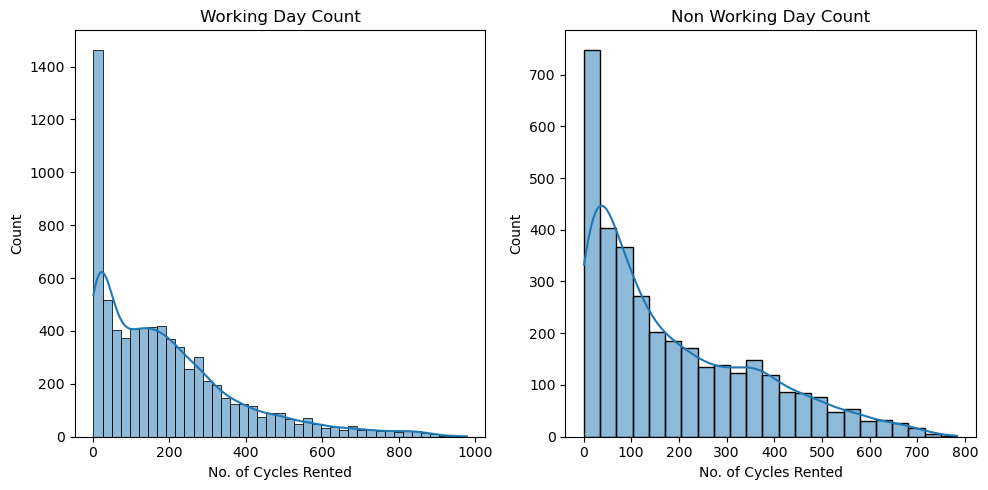

In [61]:
'''Visual Analysis to check Normal distribution of Working Day and Non Working Day Count - Histogram'''

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.histplot(ms_df[ms_df['workingday'] == 1]['count'], kde = True, ax=axs[0])
axs[0].set_xlabel('No. of Cycles Rented')
axs[0].set_title('Working Day Count')

sns.histplot(ms_df[ms_df['workingday'] == 0]['count'], kde = True, ax=axs[1])
axs[1].set_xlabel('No. of Cycles Rented')
axs[1].set_title('Non Working Day Count')

plt.tight_layout()
plt.show()

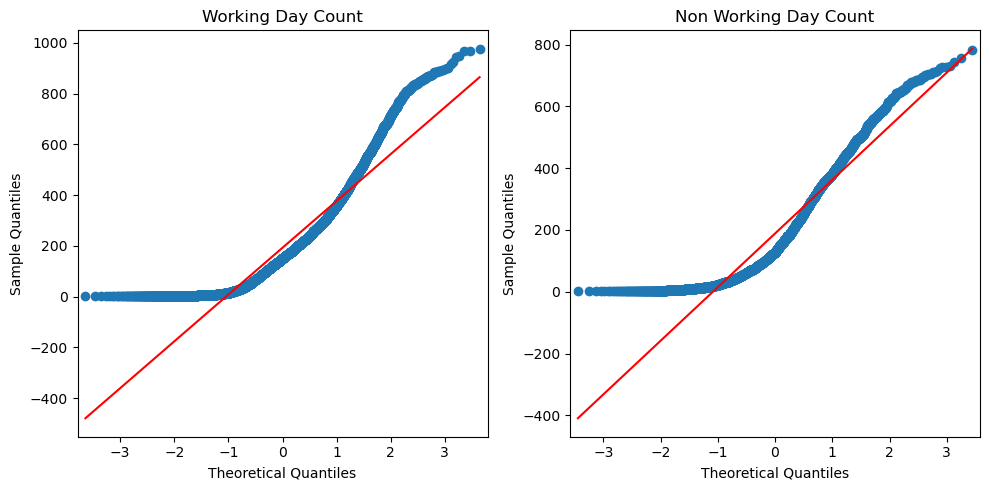

In [62]:
'''Visual Analysis to check Normal distribution of Working Day and Non Working Day Count -QQ Plot'''

from statsmodels.graphics.gofplots import qqplot

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

qqplot(ms_df[ms_df['workingday'] == 1]['count'], line='s', ax=axs[0])
axs[0].set_title('Working Day Count')

qqplot(ms_df[ms_df['workingday'] == 0]['count'], line='s', ax=axs[1])
axs[1].set_title('Non Working Day Count')

plt.tight_layout()
plt.show()

- From Histogram and QQ Plot, it was observed the count attribute of working day and Non working day is not following Normal Distribution

In [63]:
from scipy.stats import levene,shapiro

levene(ecc_wd,ecc_nwd)

LeveneResult(statistic=0.004972848886504472, pvalue=0.9437823280916695)

- The standard deviation/variance of both samples from working day and non working day are same

In [64]:
shapiro(ecc_wd)

ShapiroResult(statistic=0.8702545795617624, pvalue=2.2521124830019574e-61)

In [65]:
shapiro(ecc_nwd)

ShapiroResult(statistic=0.885211755076074, pvalue=4.4728547627911074e-45)

- As the p_value from shapiro test of two samples is far lesser than sigificance level(alpha) of 0.05,sample from working day and non working day are  not normal distributed.
- Hence,2-Sample T test should not be applied and Mann Whitney U test shall be applied

In [66]:
from scipy.stats import mannwhitneyu

statistic,p_value = mannwhitneyu(ecc_wd,ecc_nwd)
print(f'\033[4mMann-Whitney U Test Results\033[0m:')
print('statistic:',statistic)
print('p_value:',p_value)
print()

alpha = 0.05

print(f'\033[4mConclusion based on p_value\033[0m:')
if(p_value < alpha):
  print("Reject H0 (Null Hypothesis).Hence, The mean number of cycles rented is affected by Working Day")
else:
  print("Fail to Reject H0 (Null Hypothesis).Hence,The mean number of cycles rented is not affected by Working Day")

Mann-Whitney U Test Results:
statistic: 12868495.5
p_value: 0.9679139953914079

Conclusion based on p_value:
Fail to Reject H0 (Null Hypothesis).Hence,The mean number of cycles rented is not affected by Working Day


## Recommendations
- The company shall provide more electric cycle rentals in Season 3 and Weather 1 as count of rentals is more in that season.
- Weather condition 4 i.e. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog is having very few number of electric cycle rentals. The Company shall make partnership with online food and grocery delivery companies by providing bikes for their transport as people tend to purchase more online in such weather. Additionally, Rain coats and required clothing as compliment shall be provided to delivery people.
- The production of electric cycles shall be tuned as such at a given time, they shall not fall in range of outliers in count of total rentals i.e.above 650 approx.
- More frequent maintenance check shall be done in weather condition 4 as more damage is feasible in such adverse weather.
- Special equipment shall be fitted to electric cycles like wind shield etc to improve count of rentals in high windspeed conditions.
- Weather Forecasting shall be provided in company's internal platforms in order to produce electric cycles as per weather condition. This ensures no surplus of production.
- The company shall conduct awareness programs in the form of zero pollution eco-friendly tour to market their products and also shall provide special coupons, discounts to winners by conducting competitions.
- Users feedback in prior and post utilization such as connectivity to their platform,waiting time for picking up electric cycle, riding experience etc shall be collected in order to incorporate necessary things for user friendly experience.
- As per the age and physical strength of users, the company shall produce different variations in their products.
- The count of registered customers shall be further improved by providing special discounts on longer period subscription.